
##Tugas 1 Komputasi Statistika
---


**Nama Anggota Kelompok:**
1. Nadia Sukesi Sianipar 2106700776
2. Jesica Michele Yulianto 2106725002
3. Laras Kirana Anindita 2106653035
4. Annisa Fitria Anwar Damanik 2106639900

**Import modul**

---



In [ ]:
# Import tools yang hendak digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from scipy.linalg import svd
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", 200)

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

In [ ]:
# Load data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
# Look at the dataset
documents[:4]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
print("Total Documents: ", len(documents))

Total Documents:  11314


**Preprocessing**

---



In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
news_data = pd.DataFrame({'document':documents})
news_data['clean_doc'] = news_data['document'].str.replace("[^a-zA-Z#]", " ")
news_data['clean_doc'] = news_data['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
news_data['clean_doc'] = news_data['clean_doc'].apply(lambda x: x.lower())

In [ ]:
tokenized_data = news_data['clean_doc'].apply(lambda x: x.split())
tokenized_data = tokenized_data.apply(lambda x: [item for item in x if item not in stop_words])
detokenized_data = []
for i in range(len(news_data)):
    t = ' '.join(tokenized_data[i])
    detokenized_data.append(t)

news_data['clean_doc'] = detokenized_data

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_data['clean_doc'])

X.shape # check shape of the document-ter

(11314, 1000)

**Modelling**

In [ ]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [ ]:
vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
Z = vsm.fit_transform(terms)

Z.shape

(1000, 1000)

In [ ]:
type(Z)

scipy.sparse.csr.csr_matrix

In [ ]:
Z.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
print(str(vsm.vocabulary_)[:93])

{'ability': 0, 'able': 1, 'accept': 2, 'access': 3, 'according': 4, 'account': 5, 'action': 6


**Visualisasi**

---



In [ ]:
# Mari kita plot hasil diatas

x_word = V[0,:] # Baris pertama matrix V = sumbu x kata
y_word = V[1,:] # Baris kedua matrix V = sumbu y kata

# label dari setiap barisnya = kata-kata
# kita akan gunakan perintah yang sama dengan di segmen sebelum ini
print(vsm.vocabulary_)

{'ability': 0, 'able': 1, 'accept': 2, 'access': 3, 'according': 4, 'account': 5, 'action': 6, 'actions': 7, 'actual': 8, 'actually': 9, 'added': 10, 'addition': 11, 'additional': 12, 'address': 13, 'administration': 14, 'advance': 15, 'advice': 16, 'agencies': 17, 'agree': 18, 'algorithm': 19, 'allow': 20, 'allowed': 21, 'allows': 22, 'amendment': 23, 'america': 24, 'american': 25, 'americans': 26, 'analysis': 27, 'angeles': 28, 'anonymous': 29, 'answer': 30, 'answers': 31, 'anti': 32, 'anybody': 33, 'apparently': 34, 'appear': 35, 'appears': 36, 'apple': 37, 'application': 38, 'applications': 39, 'apply': 40, 'appreciate': 41, 'appreciated': 42, 'approach': 43, 'appropriate': 44, 'april': 45, 'arab': 46, 'archive': 47, 'area': 48, 'areas': 49, 'aren': 50, 'argument': 51, 'arguments': 52, 'armenia': 53, 'armenian': 54, 'armenians': 55, 'arms': 56, 'army': 57, 'article': 58, 'articles': 59, 'asked': 60, 'asking': 61, 'assume': 62, 'assuming': 63, 'atheism': 64, 'atheists': 65, 'attack'

In [ ]:
index_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [index_kata[i] for i in range(Z.shape[0])]
print(Label)

['ability', 'able', 'accept', 'access', 'according', 'account', 'action', 'actions', 'actual', 'actually', 'added', 'addition', 'additional', 'address', 'administration', 'advance', 'advice', 'agencies', 'agree', 'algorithm', 'allow', 'allowed', 'allows', 'amendment', 'america', 'american', 'americans', 'analysis', 'angeles', 'anonymous', 'answer', 'answers', 'anti', 'anybody', 'apparently', 'appear', 'appears', 'apple', 'application', 'applications', 'apply', 'appreciate', 'appreciated', 'approach', 'appropriate', 'april', 'arab', 'archive', 'area', 'areas', 'aren', 'argument', 'arguments', 'armenia', 'armenian', 'armenians', 'arms', 'army', 'article', 'articles', 'asked', 'asking', 'assume', 'assuming', 'atheism', 'atheists', 'attack', 'attempt', 'author', 'authority', 'available', 'average', 'avoid', 'away', 'background', 'base', 'baseball', 'based', 'basic', 'basically', 'basis', 'begin', 'beginning', 'belief', 'beliefs', 'believe', 'best', 'better', 'bible', 'bike', 'bios', 'bits'

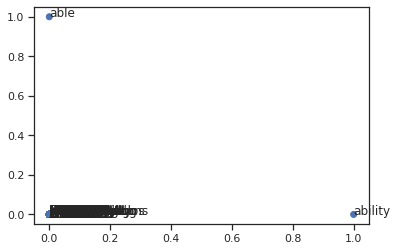

In [ ]:
# Sudah siap untuk kita plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x_word, y_word, c=['b']*len(x_word))
for i, L in enumerate(Label):
    ax.annotate(L, (x_word[i],y_word[i]))

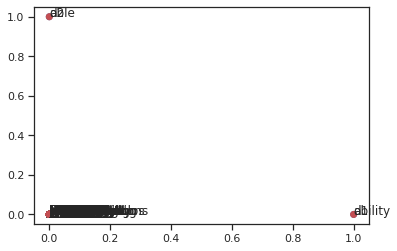

In [ ]:
# Mari kita gabungkan plot Kata dan Dokumen
x_judul = U[:,0] # Kolom pertama matrix U = sumbu x judul
y_judul = U[:,1] # Kolom kedua matrix U = sumbu y judul

Label_judul = ['d1','d2','d3','d4','d5','d6','d7','d8','d9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20']

# Saatnya kita plot
# Mulai dari "Words" terlebih dahulu dengan warna biru "b"
fig, ax = plt.subplots()
ax.scatter(x_word, y_word, c=['b']*len(x_word))
for i, L in enumerate(Label):
    ax.annotate(L, (x_word[i],y_word[i]))
    
# Lalu judul (dokumen) dengan warna Merah "r"
ax.scatter(x_judul, y_judul, c=['r']*len(x_judul))
for i, L in enumerate(Label_judul):
    ax.annotate(L, (x_judul[i],y_judul[i]))
# Analisa Plotnya, perhatikan kata "able" dan "ability"

In [ ]:
X_topics = svd_model.fit_transform(X)
embedding = TSNE(n_components=2).fit_transform(X_topics)

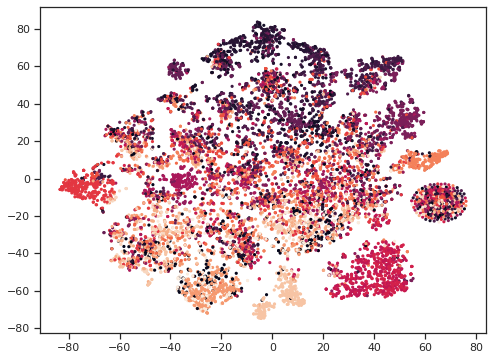

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

**Kesimpulan**

Berikut cara kelompok 1 untuk mengetahui topik yang sedang dibahas pada 20 news data
*   Pertama, kami mengimport modul dan data. Kami melakukan preprocessing dengan cara cleaning data. Kami meremove stop words (menghapus kata yang tidak mengandung informasi sama sekali) dengan cara Tokenize.
*   Kami melakukan SVD agar kami dapat melihat dengan jelas topik yang dibahas pada dataset 20 news data. \
yaitu : \
Topic 1: like know people think good time thanks  
Topic 2: thanks windows card drive mail file advance  
Topic 3: game team year games season players good  
Topic 4: drive scsi hard disk card drives problem  
Topic 5: windows file window files program problem version  
Topic 6: government space chip mail information data encryption  
Topic 7: like bike chip sounds know looks look  
Topic 8: card sale video monitor offer price jesus  
Topic 9: know card chip video government people clipper  
Topic 10: good know time bike problem jesus work  
Topic 11: think good chip clipper need encryption people  
Topic 12: thanks problem right bike good window time  
Topic 13: good people windows know sale file files  
Topic 14: space think know nasa problem year israel  
Topic 15: space good card thanks people year nasa  
Topic 16: people problem game window time work want  
Topic 17: problem good window israel people know israeli  
Topic 18: file time problem need files mail game  
Topic 19: need right file card files want good  
Topic 20: need time windows want israel window israeli  
*   Selanjutnya, data yang sudah bersih kami visualisasikan dengan bantuan scatter plot. Melalui scatter plot, kita bisa melihat sebaran topik yang hangat/sering dibicarakan. Semakin gelap warnanya, semakin sering muncul topik tersebut dalam bahasan.